
<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
Digital Image Processing <br>
<font color=2565AE size=5>
Department Of Mathematical Sciences <br>
Spring 2025<br>
<font color=3C99D size=5>
Assignment 2 <br>
</div>


---



### Full Name : Raya Namazi
### Student Number : 402100561
___

In [1]:
# DO NOT MODIFY THIS CELL
import numpy as np
import cv2
from matplotlib import pyplot as plt
import skimage.metrics
from scipy.fftpack import dct, idct

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/DIP/hw2-practical/Images

/content/drive/MyDrive/DIP/hw2-practical/Images


In [ ]:
ls

original_image.png  Q2-input.jpg               white_noise.png
periodic_noise.png  salt_and_pepper_noise.png


## **Q1: DFT Transformation**

**DFT transform**

In [4]:
def dft(image):
  '''
  function for applying DFT tranform.
  Hint:
    https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html

  input(s):
    image (ndarray): input image
  output (s):
    output_image (ndarray): transformed image
  '''
  ###############################################
  ############# YOUR CODE GOES HERE #############

  output_image = np.fft.fft2(image)

  ###############################################
  return output_image

def shift_fft(dft):
  '''
  function for shifting tranformed image.
  Hint:
    https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html

  input(s):
    dft (ndarray): input trandformed image
  output (s):
    output_image (ndarray): shifted transformed image
  '''
  ###############################################
  ############# YOUR CODE GOES HERE #############


  output_image = np.fft.fftshift(dft)

  ###############################################
  return output_image

def inverse_shift(shifted_image):
  '''
  function for inverting shift DFT.
  Hint:
    https://numpy.org/doc/stable/reference/generated/numpy.fft.ifftshift.html

  input(s):
    shifted_image (ndarray): input shifted image
  output (s):
    output_image (ndarray): inverse shifted image
  '''
  ###############################################
  ############# YOUR CODE GOES HERE #############

  output_image = np.fft.ifftshift(shifted_image)

  ###############################################
  return output_image


def idft(image):
  '''
  function for applying IDFT tranform.
  Hint:
    https://numpy.org/doc/stable/reference/generated/numpy.fft.ifft2.html

  input(s):
    image (ndarray): input image
  output (s):
    output_image (ndarray): inverse transformed image
  '''
  ###############################################
  ############# YOUR CODE GOES HERE #############

  output_image = np.real(np.fft.ifft2(image))


  ###############################################
  return output_image



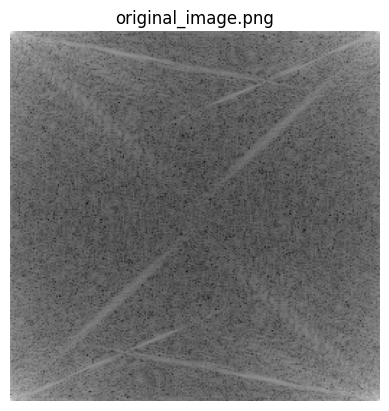

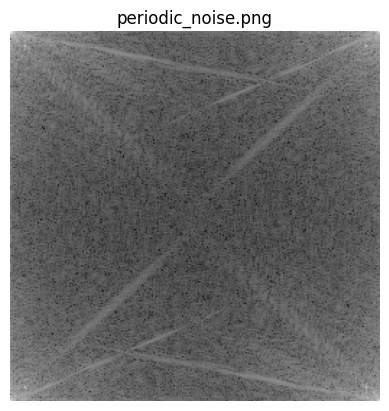

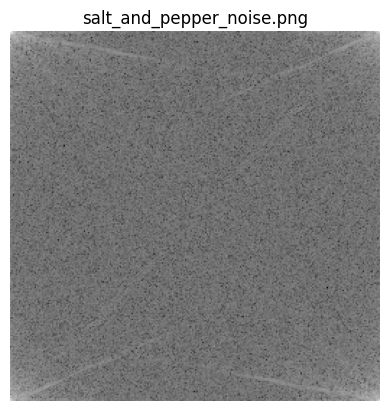

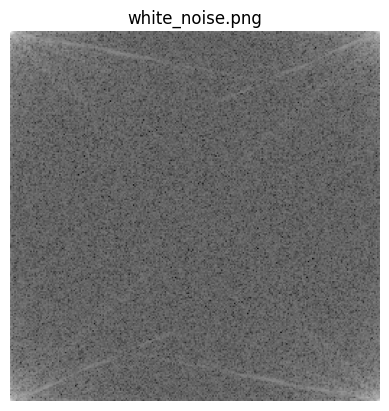

In [62]:

###############################################
############# YOUR CODE GOES HERE #############

input_files = ["original_image.png","periodic_noise.png","salt_and_pepper_noise.png","white_noise.png"]

for inpt in input_files:
    img = cv2.imread(inpt, cv2.IMREAD_GRAYSCALE).astype(np.float32)
    DFT = dft(img)
    magnitude_spectrum = np.log(np.abs(DFT) + 1)

    plt.figure()
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title(inpt)
    plt.axis("off")

plt.show()
###############################################

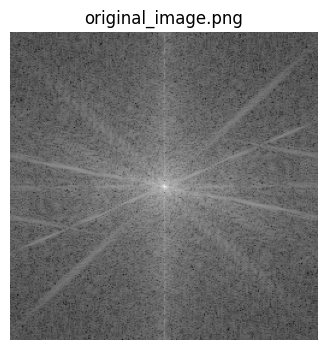

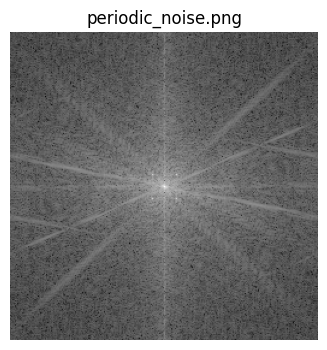

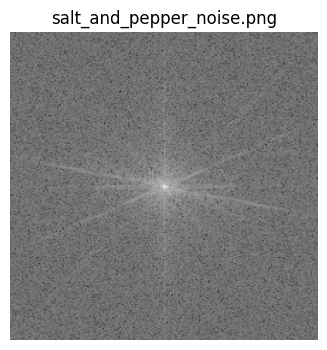

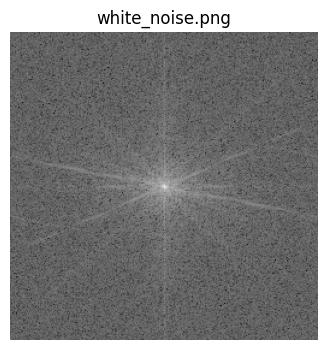

In [70]:
for inpt in input_files:

    img = cv2.imread(inpt, cv2.IMREAD_GRAYSCALE).astype(np.float32)
    DFT = dft(img)
    DFT_centered = shift_fft(DFT)
    magnitude_spectrum = np.log(np.abs(DFT_centered) + 1)
    plt.figure(figsize=(8,4))
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title(inpt)
    plt.axis("off")

plt.show()

In [39]:
def notch_filter(shape, centers, radius):
    H = np.ones(shape, dtype=np.float32)
    crow, ccol = shape[0]//2, shape[1]//2
    for (du, dv) in centers:
        for sign_u, sign_v in [ (1,1), (1,-1), (-1,1), (-1,-1) ]:
            u0 = crow + sign_u*du
            v0 = ccol + sign_v*dv
            Y, X = np.ogrid[:shape[0], :shape[1]]
            mask = (X - v0)**2 + (Y - u0)**2 <= radius**2
            H[mask] = 0
    return H

In [40]:
def gaussian_lowpass(shape, cutoff):
    P, Q = shape
    u = np.arange(P) - P//2
    v = np.arange(Q) - Q//2
    U, V = np.meshgrid(v, u)
    D2 = U**2 + V**2
    H = np.exp(-D2 / (2*(cutoff**2)))
    return H

In [60]:
img = cv2.imread("periodic_noise.png", cv2.IMREAD_GRAYSCALE).astype(np.float32)
DFT = dft(img)
Fs = shift_fft(DFT)
magnitude_before = np.log(np.abs(Fs) + 1)

notch_centers = [(10, 10)]
notch_radius  = 2
H_notch = notch_filter(img.shape, notch_centers, notch_radius)
Fs_filtered = Fs * H_notch
magnitude_after  = np.log(np.abs(Fs_filtered) + 1)

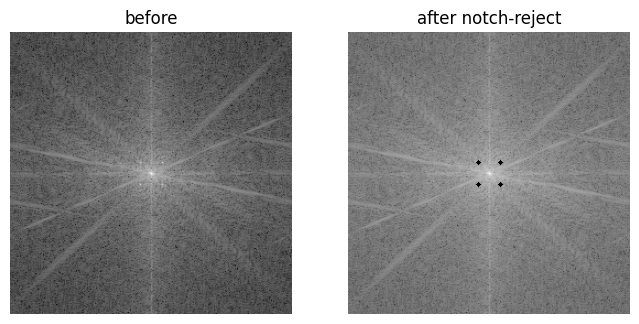

In [61]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(magnitude_before, cmap='gray')
plt.title("before")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(magnitude_after, cmap='gray')
plt.title("after notch‐reject")
plt.axis('off')

plt.show()

In [58]:
img = cv2.imread("white_noise.png", cv2.IMREAD_GRAYSCALE).astype(np.float32)

DFT = dft(img)
Fs = shift_fft(DFT)
mag_before = np.log(np.abs(Fs) + 1)

cutoff = 50
H_gauss = gaussian_lowpass(img.shape, cutoff)
Fs_filtered= Fs * H_gauss
mag_after = np.log(np.abs(Fs_filtered) + 1)

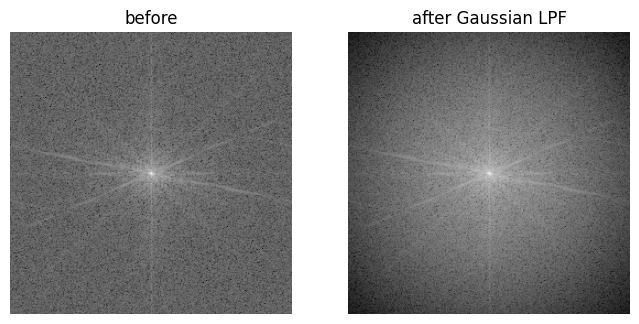

In [59]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(mag_before, cmap='gray')
plt.title("before")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(mag_after, cmap='gray')
plt.title("after Gaussian LPF")
plt.axis('off')

plt.show()

In [77]:
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio, structural_similarity
orig = cv2.imread("original_image.png", cv2.IMREAD_GRAYSCALE).astype(np.float32)
imgs = {
    "Periodic": cv2.imread("periodic_noise.png",cv2.IMREAD_GRAYSCALE).astype(np.float32),
    "Salt&Pepper": cv2.imread("salt_and_pepper_noise.png",cv2.IMREAD_GRAYSCALE).astype(np.float32),
    "White":    cv2.imread("white_noise.png",cv2.IMREAD_GRAYSCALE).astype(np.float32),
}
constructed = {}
Fp = shift_fft(dft(imgs["Periodic"]))
Hn = notch_filter(imgs["Periodic"].shape, centers=[(10,10)], radius=2)
constructed["Periodic"] = idft(inverse_shift(Fp * Hn))
constructed["Salt&Pepper"] = cv2.medianBlur(imgs["Salt&Pepper"].astype(np.uint8), ksize=3).astype(np.float32)
Fw = shift_fft(dft(imgs["White"]))
Hg = gaussian_lowpass(imgs["White"].shape, cutoff=30)
constructed["White"] = idft(inverse_shift(Fw * Hg))

Periodic Noise → MSE: 33.74, PSNR: 32.85 dB, SSIM: 0.9092


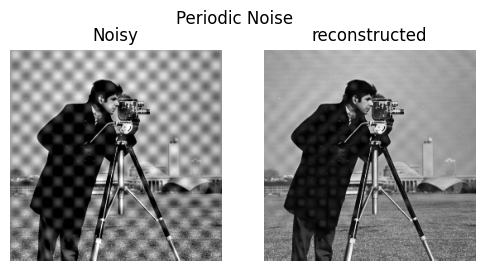

Salt&Pepper Noise → MSE: 129.76, PSNR: 27.00 dB, SSIM: 0.8759


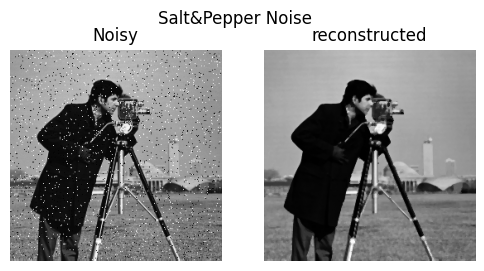

White Noise → MSE: 283.68, PSNR: 23.60 dB, SSIM: 0.6818


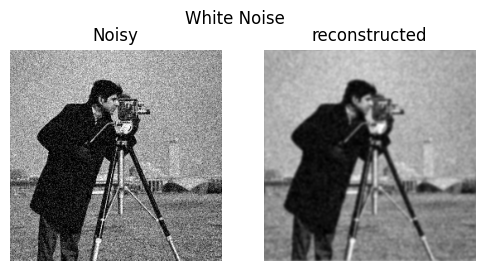

In [81]:
for noise in imgs:
    rec = np.clip(constructed[noise], 0, 255)
    orig_u8 = orig.astype(np.uint8)
    rec_u8  = rec .astype(np.uint8)

    mse  = mean_squared_error(orig, rec)
    psnr = peak_signal_noise_ratio(orig, rec, data_range=255)
    ssim = structural_similarity(orig_u8, rec_u8, data_range=255)

    print(f"{noise} Noise MSE: {mse:.2f}, PSNR: {psnr:.2f} dB, SSIM: {ssim:.4f}")

    plt.figure(figsize=(6,3))
    plt.suptitle(f"{noise} Noise")
    plt.subplot(1,2,1)
    plt.imshow(imgs[noise], cmap="gray")
    plt.title("Noisy")
    plt.axis("off")
    plt.subplot(1,2,2)
    plt.imshow(rec, cmap="gray")
    plt.title("reconstructed")
    plt.axis("off")
    plt.show()

**DCT transform**

In [13]:
def dct_transform(image):
  '''
  function for applying DCT tranform.
  Set:
    transposed function as an input
    type = 2
    norm = 'ortho'
  Hint:
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.dct.html

  input(s):
    image (ndarray): input image
  output (s):
    output_image (ndarray): transformed image
  '''
  ###############################################
  ############# YOUR CODE GOES HERE #############

  tmp = dct(image, type=2, norm='ortho', axis=0)
  output_image = dct(tmp,   type=2, norm='ortho', axis=1)

  ###############################################
  return output_image


def idct_transform(dct):
  '''
  function for inverting transformed image.
  Set:
    transposed function as an input
    type = 2
    norm = 'ortho'
  Hint:
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.idct.html

  input(s):
    dct (ndarray): input trandformed image
  output (s):
    output_image (ndarray): inverted transformed image
  '''
  ###############################################
  ############# YOUR CODE GOES HERE #############


  tmp = idct(dct,   type=2, norm='ortho', axis=1)
  output_image = idct(tmp, type=2, norm='ortho', axis=0)
  ###############################################
  return output_image

In [82]:

###############################################
############# YOUR CODE GOES HERE #############
img = cv2.imread("original_image.png", cv2.IMREAD_GRAYSCALE).astype(np.float32) / 255.0

DCT = dct_transform(img)

E = DCT**2
E_cum = np.cumsum(np.cumsum(E, axis=0), axis=1)
E_total = E_cum[-1, -1]

threshold = 0.99
h, w = DCT.shape
n = None
for k in range(1, min(h, w)+1):
    if E_cum[k-1, k-1] >= threshold * E_total:
        n = k
        break
print(f"{n}*{n} low-frequency block (≈{threshold*100:.0f}% energy)")

mask = np.zeros_like(DCT)
mask[:n, :n] = 1
C_masked = DCT * mask

construct = idct_transform(C_masked)

spec_full   = np.log(np.abs(DCT)+ 1e-3)
spec_masked = np.log(np.abs(C_masked)+1e-3)

mse  = mean_squared_error(img, construct)
psnr = peak_signal_noise_ratio(img, construct, data_range=1.0)
ssim = structural_similarity(img, construct, data_range=1.0)

print(f"MSE:  {mse:.4e}")
print(f"PSNR: {psnr:.2f} dB")
print(f"SSIM: {ssim:.4f}")
###############################################

101*101 low-frequency block (≈99% energy)
MSE:  2.7638e-03
PSNR: 25.58 dB
SSIM: 0.8172


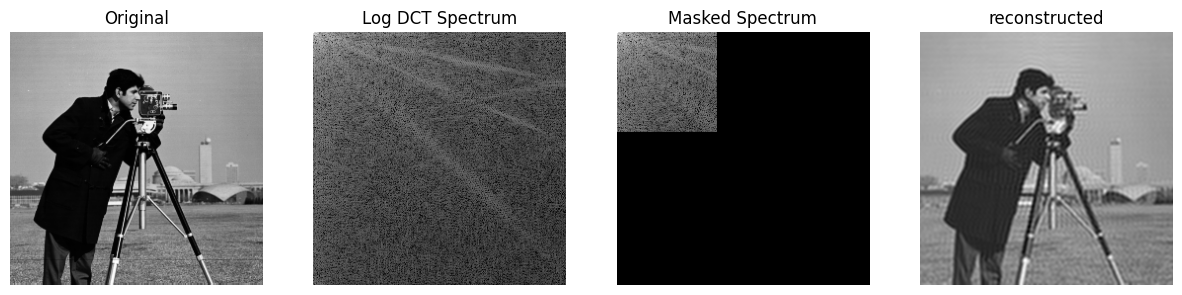

In [69]:
plt.figure(figsize=(15,4))

plt.subplot(1,4,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(spec_full, cmap='gray')
plt.title("Log DCT Spectrum")
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(spec_masked, cmap='gray')
plt.title("Masked Spectrum")
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(construct, cmap='gray')
plt.title("reconstructed")
plt.axis('off')

plt.show()

## **Q2: Image Cartoonization**

One of the applications of bilateral filters is for adding cartoon effects to color images. In this question we are going to implement the code to cartoonize a given image.

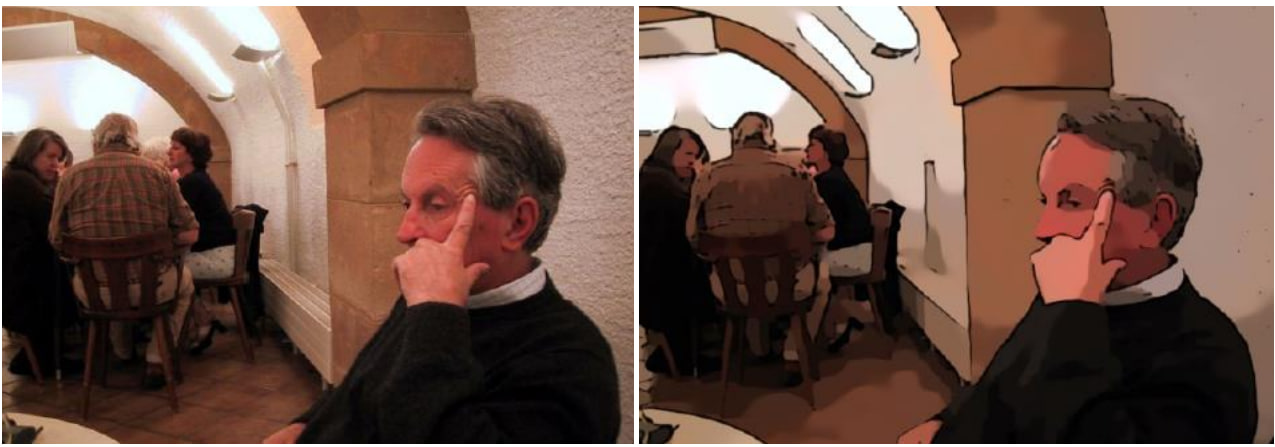

Steps for adding Cartoon effect to the given color image `img`:


1.   Blur `img` using any method you prefer to get `img_blur`.
2.   Use any edge detection method on `img_blur` to get a single channel image `img_edge`, containing the edges.
3.   Apply bilateral filter on the original image `img` to get `img_bf`.
4.   Mix `img_bf` and `img_edges` to get the desired cartoonized image.



### Step 1: Edge Detection

Implement `edge_detection` function to get a colored image as input and output a gray image indicating the edges. You are free to use any method you want or use existing functions from `opencv`.

In [16]:
def edge_detection(img: np.ndarray,
                   blur_ksize: int = 5,
                   canny_thresh1: int = 50,
                   canny_thresh2: int = 150) -> np.ndarray:

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    blurred = cv2.GaussianBlur(gray, (blur_ksize, blur_ksize), 0)

    edges = cv2.Canny(blurred, canny_thresh1, canny_thresh2)

    return edges

Now, Apply the method on `Q2-input.jpg` and save the result as `Q2-output-edges.jpg`. Your score on this part depends on the quality of the result.

In [17]:
img = cv2.imread('Q2-input.jpg')
img_edges = edge_detection(img)
cv2.imwrite('Q2-output-edges.jpg', img_edges)

True

### Step 2: Bilateral Filter

Implement Bilateral filter. This function should be implemented from scratch and you are not allowed to use any existing function or library other than `numpy`.

In [18]:
def bilateral_filter(img: np.ndarray,
                     diameter: int,
                     sigma_color: float,
                     sigma_space: float) -> np.ndarray:
    orig_dtype = img.dtype
    img = img.astype(np.float32)
    half = diameter // 2

    ax = np.arange(-half, half+1)
    xx, yy = np.meshgrid(ax, ax)
    spatial = np.exp(-(xx**2 + yy**2) / (2 * sigma_space**2))

    h, w, c = img.shape
    out = np.zeros_like(img)

    pad = ((half, half), (half, half), (0, 0))
    img_padded = np.pad(img, pad, mode='reflect')

    for i in range(h):
        for j in range(w):
            patch = img_padded[i:i+diameter, j:j+diameter]

            center = img_padded[i+half, j+half]
            diff = patch - center
            color = np.exp(-np.sum(diff**2, axis=2) / (2 * sigma_color**2))

            weights = spatial * color
            weights_sum = np.sum(weights)

            for k in range(c):
                out[i, j, k] = np.sum(patch[:, :, k] * weights) / weights_sum

    if np.issubdtype(orig_dtype, np.integer):
        out = np.clip(out, 0, 255).astype(orig_dtype)
    else:
        out = out.astype(orig_dtype)

    return out

Apply this function on `Q2-input.jpg` and save the result as `Q2-output-bf.jpg`. Use parameters by your choice to get a proper result (blurring should be noticable, but not too much) Your score on this part depends on the quality of the result.

In [22]:
image = cv2.imread('Q2-input.jpg')
bf = bilateral_filter(image, diameter=9, sigma_color=100, sigma_space=100)
cv2.imwrite("Q2-output-bf.jpg", bf)

True

### Step 3: Image Cartoonization

Use the previous functions to implement `cartoonize` function. This function takes a colored image `img` and a real number $\alpha$ as input. $\alpha$ will be a real number between 0 and 1, indicating the intensity of cartoonization. $\alpha=0$ means minimal cartoonization; output should be the original image (or very close to it) and as $\alpha$ approaches to 1, cartoonization should be more intense. Note that the dimensionality of the result should be the same as the input. Your score on this part depends on the quality of the result.

In [35]:
from pickle import FALSE
def cartoonize(img: np.ndarray,
               alpha: float = 0.5,
               bf_diameter: int = 9,
               bf_sigma_color: float = 150,
               bf_sigma_space: float = 150,
               edge_blur: int = 5,
               edge_t1: int = 100,
               edge_t2: int = 200,
               use_adaptive: bool = False,
               blockSize: int = 9,
               C: int = 9,
               dilate_kernel_size: int = 3,
               dilate_iterations: int = 1) -> np.ndarray:

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (edge_blur, edge_blur), 0)
    edges = cv2.Canny(blurred, edge_t1, edge_t2)

    kernel = np.ones((dilate_kernel_size, dilate_kernel_size), np.uint8)
    edges = cv2.dilate(edges, kernel, iterations=dilate_iterations)

    smooth = bilateral_filter(img, diameter=bf_diameter, sigma_color=bf_sigma_color, sigma_space=bf_sigma_space)

    inverted_edges = cv2.bitwise_not(edges)
    inverted_edges_3ch = cv2.cvtColor(inverted_edges, cv2.COLOR_GRAY2BGR)

    cartoon = cv2.bitwise_and(smooth, inverted_edges_3ch)

    output = cv2.addWeighted(img, 1 - alpha, cartoon, alpha, 0)
    return output

Apply the method on `Q2-input.jpg` for $\alpha=0, 0.25, 0.5, 1$ and save the results as `Q2-output-0.jpg`, `Q2-output-1.jpg`,`Q2-output-2.jpg` and `Q2-output-3.jpg`, respectively.

In [36]:
img = cv2.imread("Q2-input.jpg", cv2.IMREAD_COLOR)
alphas = [1.0,0.5,0.25,0.0]
filenames = ["Q2-output-3.jpg", "Q2-output-2.jpg", "Q2-output-1.jpg", "Q2-output-0.jpg"]

for alpha, fname in zip(alphas, filenames):
    out_img = cartoonize(img, alpha=alpha)
    cv2.imwrite(fname, out_img)
    print(f"Saved {fname}")

Saved Q2-output-3.jpg
Saved Q2-output-2.jpg
Saved Q2-output-1.jpg
Saved Q2-output-0.jpg
